In [1]:
import pandas as pd

Jason Strimpel’s bulk stock data series web system allows anyone to easily download daily stock prices into a csv file. 

My data ranges from 2011-01-03 to 2020-12-25. For my project, I chose the stocks of Apple, Amazon, and Tesla.

In [2]:
# Source - http://finance.jasonstrimpel.com/bulk-stock-download/
stocks_df = pd.read_csv('/Users/ivanpatel/Desktop/closing_prices.csv')
stocks_df

,Date,AAPL,AMZN,TSLA
0,1/3/11,10.153708,184.220001,5.324000
1,1/4/11,10.206702,185.009995,5.334000
2,1/5/11,10.290195,187.419998,5.366000
3,1/6/11,10.281874,185.860001,5.576000
4,1/7/11,10.355506,185.490005,5.648000
...,...,...,...,...
2508,12/18/20,126.660004,3201.649902,695.000000
2509,12/21/20,128.229996,3206.179932,649.859985
2510,12/22/20,131.880005,3206.520020,640.340027
2511,12/23/20,130.960007,3185.270020,645.979980


In [3]:
stocks_vol_df = pd.read_csv('/Users/ivanpatel/Desktop/volume.csv')
stocks_vol_df

,Date,AAPL,AMZN,TSLA
0,1/3/11,445138400,5331400,6415000
1,1/4/11,309080800,5031800,5937000
2,1/5/11,255519600,3418800,7233500
3,1/6/11,300428800,3179700,10306000
4,1/7/11,311931200,5221700,11239500
...,...,...,...,...
2508,12/18/20,192541500,5995700,222126200
2509,12/21/20,121251600,3836800,58045300
2510,12/22/20,168904800,2369400,51716000
2511,12/23/20,88223700,2093800,33173000


### Data Visualization and Understanding

Neither datasets have any missing observations. Note that the market is not open on holidays and weekends.

In [4]:
stocks_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2513 non-null   object 
 1   AAPL    2513 non-null   float64
 2   AMZN    2513 non-null   float64
 3   TSLA    2513 non-null   float64
dtypes: float64(3), object(1)
memory usage: 78.7+ KB


In [5]:
stocks_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2513 non-null   object
 1   AAPL    2513 non-null   int64 
 2   AMZN    2513 non-null   int64 
 3   TSLA    2513 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 78.7+ KB


In [6]:
stocks_df.describe()

,AAPL,AMZN,TSLA
count,2513.000000,2513.000000,2513.000000
mean,34.375212,927.728305,62.764073
std,24.721960,817.809814,91.809640
min,9.714680,160.970001,4.366000
25%,17.348335,282.100006,23.436001
50%,26.253185,587.000000,45.344002
75%,42.640545,1601.859985,61.669998
max,133.948898,3531.449951,695.000000


Notice that stock prices for Google and Amazon have the highest standard deviations. In the case of stock prices, standard deviations measure how widely prices are dispersed from the average price. In other words, a stock's standard deviation is that stock's measure of volatility. 

In [7]:
stocks_vol_df.describe()


,AAPL,AMZN,TSLA
count,2.513000e+03,2.513000e+03,2.513000e+03
mean,2.550876e+08,4.293271e+06,3.164611e+07
std,2.007307e+08,2.380718e+06,2.856358e+07
min,2.420510e+07,8.813000e+05,1.198000e+06
25%,1.141584e+08,2.767900e+06,1.269600e+07
50%,1.841928e+08,3.688000e+06,2.489000e+07
75%,3.345692e+08,5.044600e+06,4.027350e+07
max,1.880998e+09,2.413420e+07,3.046940e+08


https://www.investopedia.com/articles/investing/060315/stocks-trade-volume-important.asp

Daily trading volume is simply the total amount of shares traded for the day. Out of all the stocks in our data, Tesla has the largest trading volume. As this article points out, when more money is moving a stock price, it means there is more demand for that stock. Thus a stock that’s appreciating on high volume is more likely to be a sustainable move. 

Say you could go back to 2011-01-03 with $10,000 and the stocks data analyzed in this project. You know you could make a lot of money in the next 10 years because you know the prices. But which stock should you buy?

Like many investors, you want to maximize your profit which is done buy buying the stock with the highest return. This is where the idea of normalization is useful. The Normalized Price indicator graphs the price movement of an instrument using 100 as the base value for a user specified base date/time. For example, a value of 115 means the price has increased 15\% since the base date.

In this case, my base value is just one. But the idea still applies. 

In [10]:
# A function to normalize the prices

def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = df[i] / df[i][0]
  
  return x 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

def plot_prices(df, ylabel, title):
    df.plot(x='Date', y=['AAPL', 'AMZN','TSLA'], figsize = (15,7))
    plt.ylabel(ylabel)
    plt.title(title)

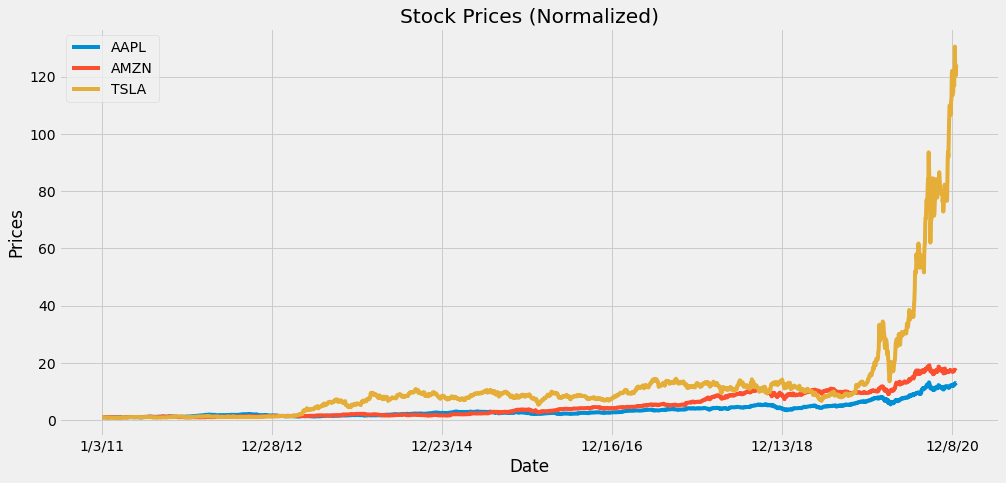

In [12]:
plot_prices(normalize(stocks_df), 'Prices', 'Stock Prices (Normalized)')

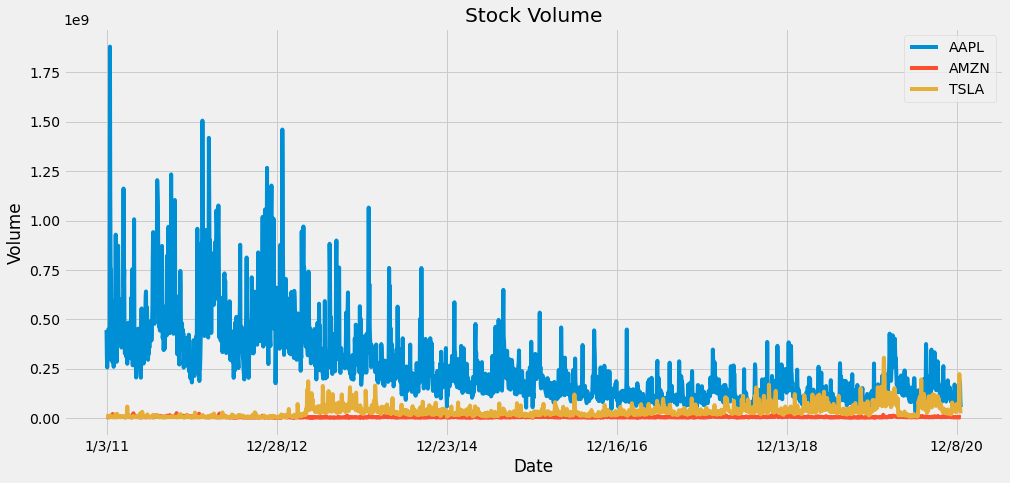

In [39]:
plot_prices(stocks_vol_df, 'Volume', 'Stock Volume')

I'll build a model that predicts the stock price of a company on a particular trading day given its previous day's price and trading volume. I'll use 75% of the data to train this model, and the remaining 25% to test how well the model performs on unseen data

## Data Preparation.

In [14]:
# ---------------------------------------------------------------------------*
# Function to concatenate the date, stock price, and volume in one dataframe.*
# Then, return the input/output (target) data for AI/ML Model                *
# Note that our goal is to predict the future stock price                    *
# Target stock price today will be tomorrow's price                          *
# ---------------------------------------------------------------------------*

def individual_stock(price_df, vol_df, name, window):
    data = pd.DataFrame({'Date': price_df['Date'],
                         'Closing Price': stocks_df[name], 
                         'Volume': vol_df[name] })
    
    # Target column
    data['Target'] = data[['Closing Price']].shift(-window)
    data = data[:-1]
    return data

# ----------------------------------------------------------------*
# Function to scale the data, create feature and target, and      *
# return the training and test sets.                              *
# ----------------------------------------------------------------*                                                                 |

from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler(feature_range = (0,1))
    
def data_preprocessing(data, train_size):
    price_volume_target_scaled_df = s.fit_transform(data.drop(columns='Date'))
    
    # Create Feature and Target by selecting the appropriate columns from the numpy array. 
    X = price_volume_target_scaled_df[:, :2]
    y = price_volume_target_scaled_df[:, 2:]
    
    split = int(train_size * len(X))
    
    # Get the training data
    X_train = X[:split]
    y_train = y[:split]
    
    # Get the test data
    X_test = X[split:]
    y_test = y[split:]
    
    # Pack the datasets into a tuple and return them
    return (X, y, X_train, X_test, y_train, y_test)

# ----------------------------------------------------------------*
# A plotting function that will plot both training and test sets  *                              |
# ----------------------------------------------------------------* 
def show_plot(data, title):
    plt.figure(figsize=(15,7))
    plt.plot(data, linewidth=3)
    plt.title(title)

### Model Building

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.linear_model import Ridge
rr = Ridge(alpha=2)

# ----------------------------------------------------------------*
# Function that fits a linear regression model,                   *
# returns test accuracy.                                          *
# ----------------------------------------------------------------*                                                                 |

def fit_linear_regression(X_train, X_test, y_train, y_test, name):
    lr.fit(X_train, y_train)
    lr_accuracy = lr.score(X_test, y_test)
    
    print(name + "'s" + ' Test Accuracy is: ' + str(lr_accuracy))
    
# ----------------------------------------------------------------*
# Function that fits a Ridge regression model,                    *
# returns test accuracy.                                          *
# ----------------------------------------------------------------*                                                                 |

def fit_ridge_regression(X_train, X_test, y_train, y_test, name):
    rr.fit(X_train, y_train)
    rr_accuracy = rr.score(X_test, y_test)
    
    print(name + "'s" + ' Test Accuracy is: ' + str(rr_accuracy))    
    
# ----------------------------------------------------------------*
# Function that plots the actual and predicted prices             *
# ----------------------------------------------------------------*                                                                 |
    
def plot_actual_prices_and_predictions(X, original_data, name, model):
    predicted = []
    close = []
    predicted_prices = []
    
    if model == 'Ridge':
        predicted_prices = rr.predict(X)
        for i in predicted_prices:
            predicted.append(i[0])
    
    else:
        predicted_prices = lr.predict(X)
        for i in predicted_prices:
            predicted.append(i[0])
    
    for i in X:
        close.append(i[0])
        
    df_predicted = original_data[['Date']]
    df_predicted['Close'] = close
    df_predicted['Predicted Price'] = predicted
    
    df_predicted.plot(x='Date', y=['Close', 'Predicted Price'], figsize = (7,4))
    plt.title(name + "'s" + " Actual Prices v. Predicted Prices")
    plt.show()

### Multiple Linear Regression

AAPL's Test Accuracy is: 0.9954293875661161


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


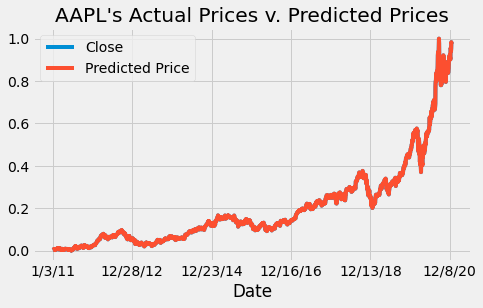

In [16]:
## APPLE's Predictions

apple = individual_stock(stocks_df, stocks_vol_df, 'AAPL', 1);
X_apple, y_apple, X_train_apple, X_test_apple, y_train_apple, y_test_apple = data_preprocessing(apple, 0.75);
fit_linear_regression(X_train_apple, X_test_apple, y_train_apple, y_test_apple, 'AAPL');
plot_actual_prices_and_predictions(X_apple, apple, 'AAPL', 'Linear');

AMZN's Test Accuracy is: 0.9928714999326373


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


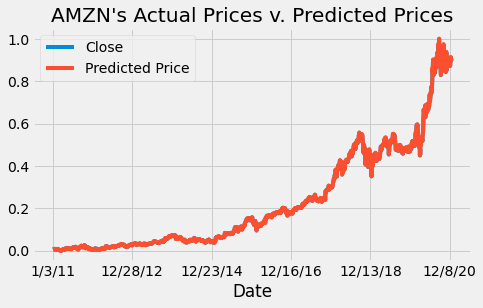

In [17]:
# AMZN's Predictions

amzn = individual_stock(stocks_df, stocks_vol_df, 'AMZN', 1);
X, y, X_train, X_test, y_train, y_test = data_preprocessing(amzn, 0.75);
fit_linear_regression(X_train, X_test, y_train, y_test, 'AMZN');
plot_actual_prices_and_predictions(X, amzn, 'AMZN', 'Linear');

TSLA's Test Accuracy is: 0.9953172796757062


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


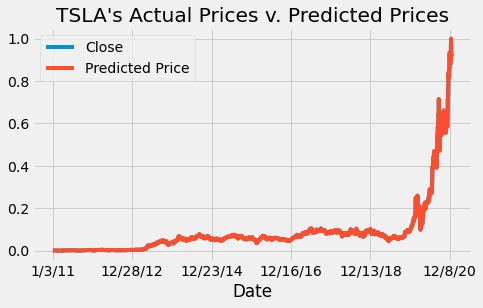

In [18]:
# TSLA's Predictions
tsla = individual_stock(stocks_df, stocks_vol_df, 'TSLA', 1);
X, y, X_train, X_test, y_train, y_test = data_preprocessing(tsla, 0.75);
fit_linear_regression(X_train, X_test, y_train, y_test, 'TSLA');
plot_actual_prices_and_predictions(X, tsla, 'TSLA', 'Linear');

## Simple Linear Regression

In [19]:
# Apple's simple predictions
apple = individual_stock(stocks_df, stocks_vol_df, 'AAPL', 1);
X_apple, y_apple, X_train_apple, X_test_apple, y_train_apple, y_test_apple = data_preprocessing(apple, 0.75);
fit_linear_regression(X_train_apple[:, 0].reshape(-1,1), X_test_apple[:, 0].reshape(-1,1), y_train_apple, y_test_apple, 'AAPL');

AAPL's Test Accuracy is: 0.9954295643650678


In [20]:
# Amazon's simple predictions
amzn = individual_stock(stocks_df, stocks_vol_df, 'AMZN', 1);
X, y, X_train, X_test, y_train, y_test = data_preprocessing(amzn, 0.75);
fit_linear_regression(X_train[:, 0].reshape(-1,1), X_test[:, 0].reshape(-1,1), y_train, y_test, 'AMZN');

AMZN's Test Accuracy is: 0.9928689234629383


In [21]:
# Tesla's simple predictions
tsla = individual_stock(stocks_df, stocks_vol_df, 'TSLA', 1);
X, y, X_train, X_test, y_train, y_test = data_preprocessing(tsla, 0.75);
fit_linear_regression(X_train[:, 0].reshape(-1,1), X_test[:, 0].reshape(-1,1), y_train, y_test, 'TSLA');

TSLA's Test Accuracy is: 0.9953421069260201


## Ridge Regression Results

AAPL's Test Accuracy is: 0.8218138938058192


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


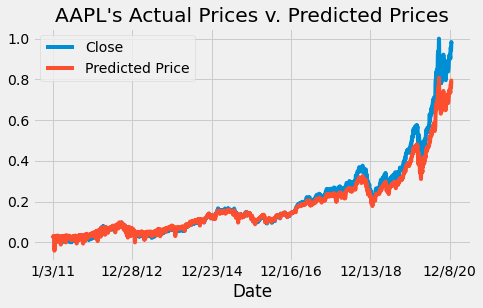

In [22]:
## APPLE's Predictions

apple = individual_stock(stocks_df, stocks_vol_df, 'AAPL', 1);
X_apple, y_apple, X_train_apple, X_test_apple, y_train_apple, y_test_apple = data_preprocessing(apple, 0.75);
fit_ridge_regression(X_train_apple, X_test_apple, y_train_apple, y_test_apple, 'AAPL');
plot_actual_prices_and_predictions(X_apple, apple, 'AAPL', 'Ridge');

AMZN's Test Accuracy is: 0.9349961712084827


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


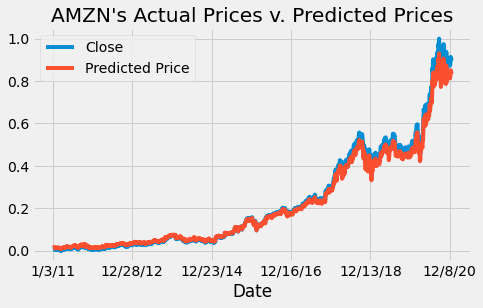

In [23]:
# AMZN's Predictions

amzn = individual_stock(stocks_df, stocks_vol_df, 'AMZN', 1);
X, y, X_train, X_test, y_train, y_test = data_preprocessing(amzn, 0.75);
fit_ridge_regression(X_train, X_test, y_train, y_test, 'AMZN');
plot_actual_prices_and_predictions(X, amzn, 'AMZN', 'Ridge');

TSLA's Test Accuracy is: 0.5522714606112699


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


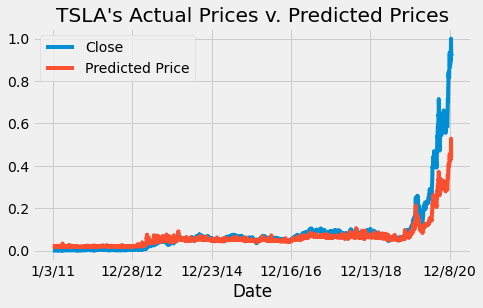

In [24]:
# TSLA's Predictions
tsla = individual_stock(stocks_df, stocks_vol_df, 'TSLA', 1);
X, y, X_train, X_test, y_train, y_test = data_preprocessing(tsla, 0.75);
fit_ridge_regression(X_train, X_test, y_train, y_test, 'TSLA');
plot_actual_prices_and_predictions(X, tsla, 'TSLA', 'Ridge');

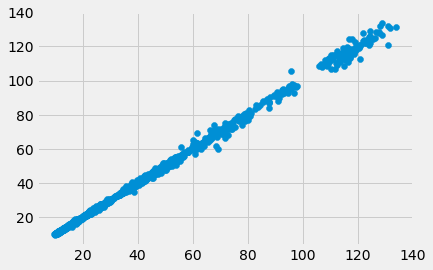

In [30]:
plt.scatter(x=apple['Closing Price'], y=apple['Target'])

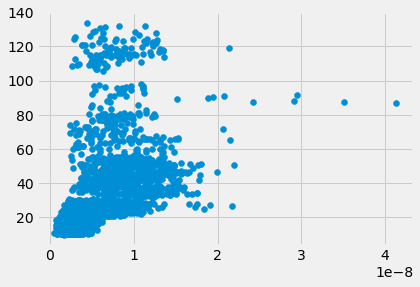

In [34]:
plt.scatter(x=1/apple['Volume'], y=apple['Target'])